#### 라이브러리 불러오기

In [11]:
import os
import pandas as pd

from xgboost import plot_tree
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#### Setting

In [12]:
SEED = 1234

In [13]:
import matplotlib.font_manager as fm
import platform

os_name = platform.system()

# font_path는 사용할 폰트에 따라 변경하면 됨
font_path = 'c:/Windows/Fonts/malgun.ttf' if os_name=='Windows' \
    else '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_family = fm.FontProperties(fname=font_path).get_name()

# font 설정
plt.rcParams['font.family'] = font_family

In [14]:
# 폰트캐시까지 삭제 후 한글폰트가 사용될 수 있도록 캐시 삭제
# --> 이렇게 해야 비로소 한글이 표현되는 경우가 많음
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [font_family]

#### 원본 데이터를 이용한 모델링

##### 원본 데이터 불러오기

In [15]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
data_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))

In [16]:
data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 데이터 (간단) 전처리

* 결측치 처리

In [17]:
# 나이는 전체 중앙값으로 변환
data_df['Age'].fillna(data_df['Age'].median(), inplace=True)

# 승선항은 최빈값(mode()중 첫번째)으로 변환
data_df['Embarked'].fillna(data_df['Embarked'].mode()[0], inplace=True)

* 문자열 컬럼을 숫자로 변환

In [18]:
data_df.Sex = data_df.Sex.map({'male':0, 'female': 1})
data_df.Embarked = data_df.Embarked.map({
    'S': 0, 'C': 1, 'Q': 2
})

##### 훈련/학습용 데이터 분리

In [19]:
# 필요한 특성과 타겟 변수 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

data_x = data_df[features]
data_y = data_df[target]

train_x, test_x, train_y, test_y = \
    train_test_split(data_x, data_y, test_size=0.2, random_state=SEED)

##### 모델 훈련

In [20]:
model = XGBClassifier(n_estimators=100, random_state=SEED)
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

##### 정확도 확인

In [21]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'XG Model Accuracy: {accuracy:.5f}')

XG Model Accuracy: 0.84916


##### 속성 중요도 확인

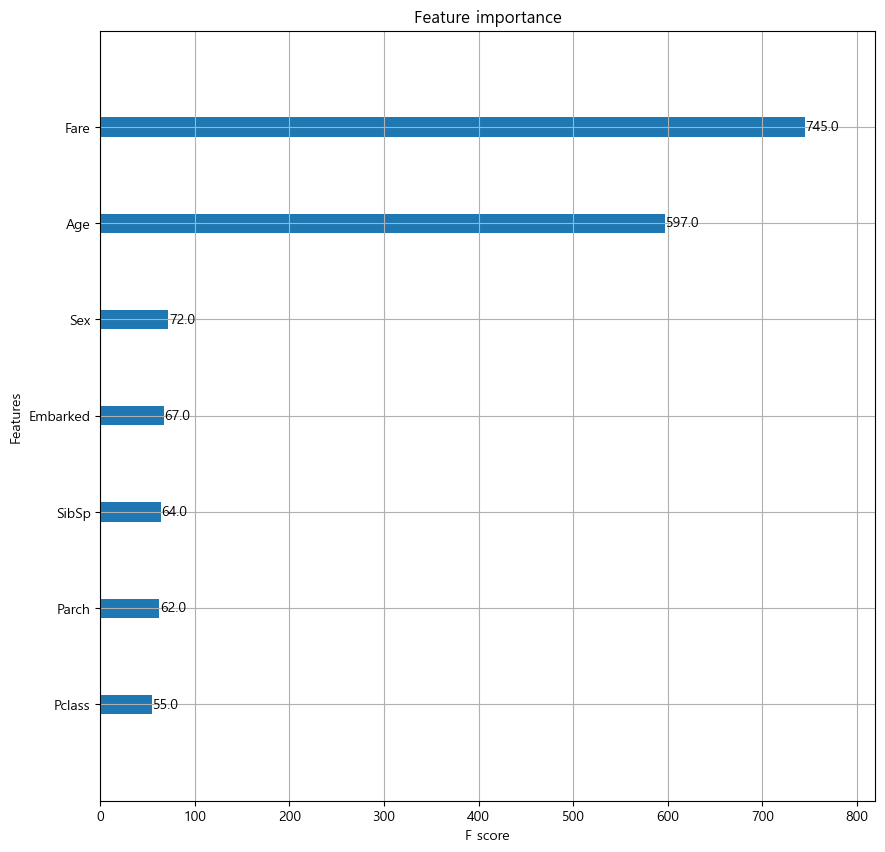

In [22]:
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.show()

#### 전처리된 데이터를 이용한 모델링

##### 전처리 데이터 불러오기

In [23]:
DATA_PATH = os.path.join(os.getcwd(), 'data', '11_titanic')

data_df = pd.read_csv(os.path.join(DATA_PATH, 'preprocessing_data.csv'))
label_df = pd.read_csv(os.path.join(DATA_PATH, 'preprocessing_label.csv'))

##### 훈련/시험용 데이터 분리

In [24]:
train_x, test_x, train_y, test_y = \
    train_test_split(data_df, label_df, test_size=0.2, random_state=SEED)

##### 모델 훈련

In [25]:
model_xg = XGBClassifier(n_estimators=100, random_state=SEED)
model_xg.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

##### 정확도 확인

In [26]:
predictions_xg = model_xg.predict(test_x)
accuracy_xg = accuracy_score(test_y, predictions_xg)
print(f'XG Model Accuracy: {accuracy_xg:.5f}')

XG Model Accuracy: 0.81564


##### 속성 중요도 확인

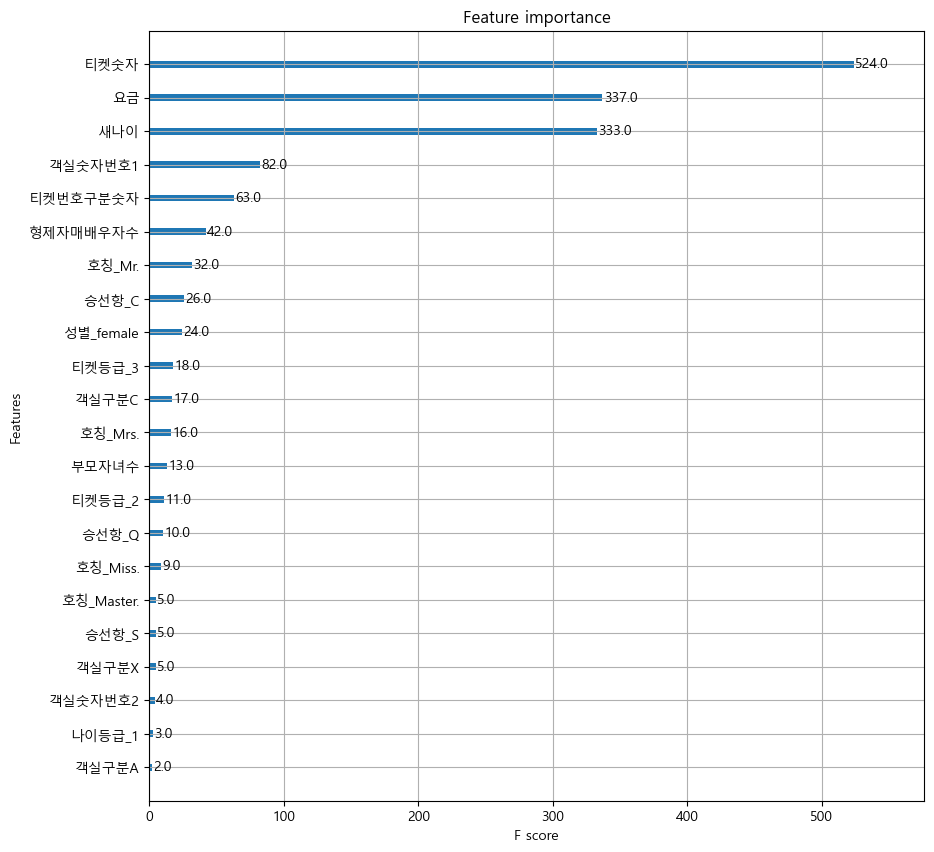

In [27]:
rcParams['figure.figsize'] = 10, 10
plot_importance(model_xg)
plt.show()